In [1]:
import numpy as np
from tqdm import tqdm_notebook as tqdm
# import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from matplotlib import ticker

In [2]:
N = 400
total=np.zeros((1,5))
faulty = []
for i in range(N):
    try:
        #test=np.loadtxt('FTCarbon_3rd_c+/FTCarbon_3rd_c+{}.txt'.format(i),delimiter=',')                      
        #test=np.loadtxt('FTSteane_3rd_q/FTSteane_3rd_q{}.txt'.format(i),delimiter=',')                          
        #test=np.loadtxt('FTRotSurf_3rd_f+/FTRotSurf_3rd_f+{}.txt'.format(i),delimiter=',')    
        test=np.loadtxt('CarbFinal_j/CarbFinal_j{}.txt'.format(i),delimiter=',')             

        #test = np.loadtxt("RotSurfFinal_c/RotSurfFinal_c{}.txt".format(i),delimiter=',')
        #test = np.loadtxt("SteaneFinal_a+++/SteaneFinal_a+++{}.txt".format(i),delimiter=',')
    except FileNotFoundError:
        faulty.append('{}'.format(i))
        continue
    total=total+test
total = total/(N-len(faulty))
print("Dead files: ", faulty,", ",len(faulty))
N = print(total)

Dead files:  [] ,  0
[[0.         0.0025     0.005      0.0075     0.01      ]
 [0.06889583 0.21464583 0.24454167 0.26397917 0.27285417]
 [0.07064583 0.21125    0.24885417 0.26852083 0.28435417]
 [0.03042278 0.06158624 0.06157979 0.06237366 0.06160428]
 [0.03163916 0.0606675  0.06097283 0.06057372 0.05960452]]


In [3]:
#np.savetxt('text/FTSteane_3rd_q.txt', total, delimiter=",")
#np.savetxt('text/FTRotSurf_3rd_f+.txt', total, delimiter=",")
#np.savetxt('text/FTCarbon_e.txt', total, delimiter=",")

np.savetxt("text/CarbFinal_j.txt", total, delimiter=",")

#np.savetxt('text/FTCarbon_3rd_c+.txt', total, delimiter=",")

#np.savetxt('text/RotSurfFinal_c.txt', total, delimiter=",")
#np.savetxt('text/SteaneFinal_a+++.txt', total, delimiter=",")

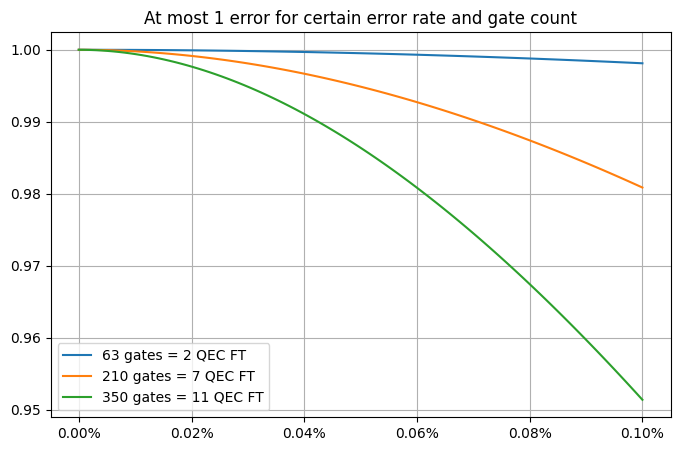

In [29]:
# p = 0.994
# print(p**150)
# print((p**149)*150*(1-p))

g = [63,3*63+21,5*63+35]
fig, ax = plt.subplots(figsize=(8,5))

y = []

for j in g:
    p = np.linspace(0.999,1,100)
    hmm = [(i**(j))+(i**(j-1))*j*(1-i) for i in p]
    y.append(hmm)
    p = [1-i for i in p]
    ax.plot(p,hmm,label="{} gates".format(j)+" = {} QEC FT".format(int(j/30)))

#ax.hlines(0.5,0,0.01, color="red", linewidth=3, linestyles="dotted")
ax.grid()
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))
plt.legend()
plt.title("At most 1 error for certain error rate and gate count")
plt.show()

/tmp/ipykernel_20216/4141691002.py:8: RuntimeWarning: invalid value encountered in double_scalars
  x = y[1][i]/y[0][i]
/tmp/ipykernel_20216/4141691002.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


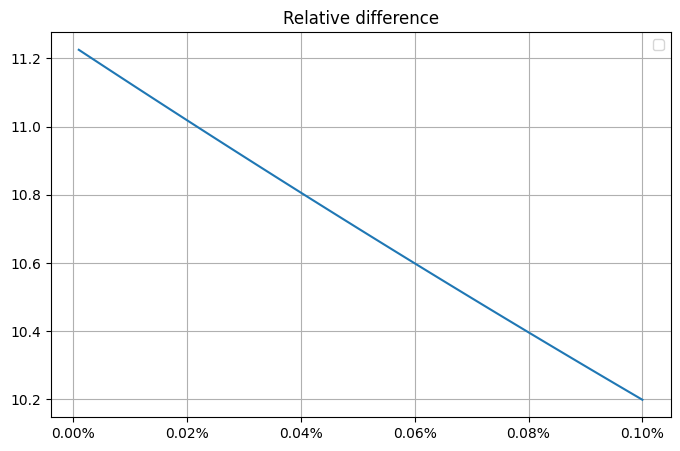

In [30]:
for i in range(len(y)):
    for j in range(len(y[0])):
        y[i][j] = 1 - y[i][j]

k = []

for i in range(len(y[0])):
    x = y[1][i]/y[0][i]
    k.append(x)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(p,k)
ax.grid()
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))
plt.legend()
plt.title("Relative difference")
plt.show()